In [1]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pylab as plt
import statsmodels.api as sm
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('regression_data.csv', delimiter= ';')
print(df.head())

           id        date  bedrooms bathrooms  sqft_living  sqft_lot floors  \
0  7129300520  13/10/2014         3         1         1180      5650      1   
1  6414100192  09/12/2014         3      2,25         2570      7242      2   
2  5631500400  25/02/2015         2         1          770     10000      1   
3  2487200875  09/12/2014         4         3         1960      5000      1   
4  1954400510  18/02/2015         3         2         1680      8080      1   

   waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
0           0     0          3  ...        1180              0      1955   
1           0     0          3  ...        2170            400      1951   
2           0     0          3  ...         770              0      1933   
3           0     0          5  ...        1050            910      1965   
4           0     0          3  ...        1680              0      1987   

   yr_renovated  zipcode      lat      long sqft_living15  sqft_lot1

In [3]:
print('COLUMNAS')
print(df.columns)
print('\n')
print('INFO')
df.info()

COLUMNAS
Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')


INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             21597 non-null  int64 
 1   date           21597 non-null  object
 2   bedrooms       21597 non-null  int64 
 3   bathrooms      21597 non-null  object
 4   sqft_living    21597 non-null  int64 
 5   sqft_lot       21597 non-null  int64 
 6   floors         21597 non-null  object
 7   waterfront     21597 non-null  int64 
 8   view           21597 non-null  int64 
 9   condition      21597 non-null  int64 
 10  grade          21597 non-null  int64 
 11  sqft_above     

In [4]:
df_copia = df.copy()

In [5]:
df = df.drop(columns = ['date','lat','long','zipcode'],axis = 1 ) 

In [6]:
df = df.drop(columns = ['sqft_above','sqft_basement','sqft_living','sqft_lot'], axis = 1)
print(df.head())
print(df.columns)

           id  bedrooms bathrooms floors  waterfront  view  condition  grade  \
0  7129300520         3         1      1           0     0          3      7   
1  6414100192         3      2,25      2           0     0          3      7   
2  5631500400         2         1      1           0     0          3      6   
3  2487200875         4         3      1           0     0          5      7   
4  1954400510         3         2      1           0     0          3      8   

   yr_built  yr_renovated  sqft_living15  sqft_lot15   price  
0      1955             0           1340        5650  221900  
1      1951          1991           1690        7639  538000  
2      1933             0           2720        8062  180000  
3      1965             0           1360        5000  604000  
4      1987             0           1800        7503  510000  
Index(['id', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'yr_renovated', 'sqft_living15

In [7]:
for i in range(len(df['yr_renovated'])):
    if df['yr_renovated'][i] != 0:
        df['yr_built'][i] = df['yr_renovated'][i]
df = df.drop(columns=['yr_renovated'],axis= 1)
print(df['yr_built'])

0        1955
1        1991
2        1933
3        1965
4        1987
         ... 
21592    2009
21593    2014
21594    2009
21595    2004
21596    2008
Name: yr_built, Length: 21597, dtype: int64


In [8]:
df.to_csv('csv_limpio.csv')

In [9]:
print(df.corr())

                     id  bedrooms  waterfront      view  condition     grade  \
id             1.000000  0.001150   -0.002727  0.011536  -0.023803  0.008188   
bedrooms       0.001150  1.000000   -0.006834  0.080008   0.026496  0.356563   
waterfront    -0.002727 -0.006834    1.000000  0.401971   0.016611  0.082888   
view           0.011536  0.080008    0.401971  1.000000   0.045999  0.251728   
condition     -0.023803  0.026496    0.016611  0.045999   1.000000 -0.146896   
grade          0.008188  0.356563    0.082888  0.251728  -0.146896  1.000000   
yr_built       0.017710  0.166855   -0.000526 -0.018442  -0.396614  0.461655   
sqft_living15 -0.002701  0.393406    0.086507  0.280681  -0.093072  0.713867   
sqft_lot15    -0.138557  0.030690    0.030781  0.072904  -0.003126  0.120981   
price         -0.016772  0.308787    0.266398  0.397370   0.036056  0.667951   

               yr_built  sqft_living15  sqft_lot15     price  
id             0.017710      -0.002701   -0.138557 -0.01

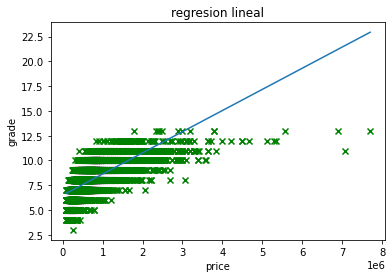

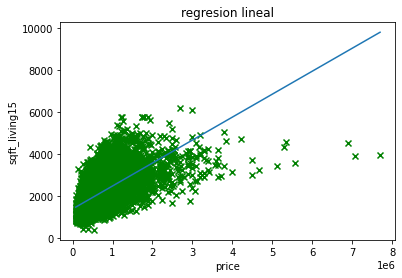

In [10]:
x2 = df['price']
y6 = df['grade']
y7 = df['sqft_living15']

x2_const = sm.add_constant(x2)

def regresion(y,x,xconst):
    modelo = sm.OLS(y,xconst).fit()
    pred = modelo.predict(xconst)
    try:
        const = modelo.params[0]
        coef = modelo.params[1]
        x_1 = np.linspace(x.min(),x.max(),50)
        y_1 = coef*x_1 + const
    except:
        pass
    plt.plot(x_1,y_1, label = f'{x.name} vs {y.name} = {coef}*{x.name} + {const}')
    plt.scatter(x,y,marker = 'x', c = 'g', label = f'{x.name} vs {y.name}')
    plt.title('regresion lineal')
    plt.xlabel(f'{x.name}')
    plt.ylabel(f'{y.name}')
    plt.show()
regresion(y6, x2, x2_const)
regresion(y7, x2, x2_const)

[ 7  6  8 11  9  5 10 12  4  3 13]


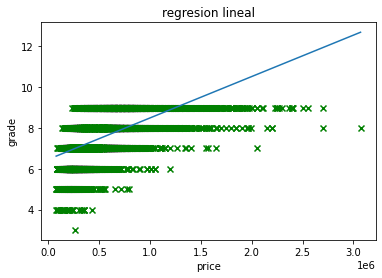

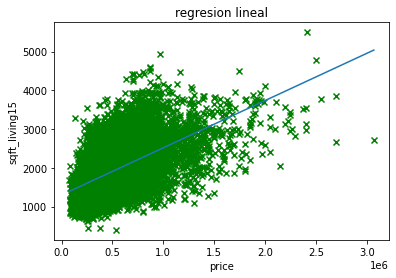

In [11]:
print(df['grade'].unique())
for i in range(len(df['grade'])):
    if df['grade'][i] > 9:
        df = df.drop([i], axis = 0)
x2 = df['price']

y6 = df['grade']

x2_const = sm.add_constant(x2)
regresion(y6, x2, x2_const)

a = df['sqft_living15'].unique()


y7 = df['sqft_living15']
regresion(y7, x2, x2_const)

In [12]:
y = df['price']
x = df.drop(['price','id', 'sqft_lot15', 'floors', 'waterfront', 'condition', 'yr_built', 'grade'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

logreg = LogisticRegression(max_iter= 100)
logreg.fit(x_train,y_train)
scoretrain = logreg.score(x_train, y_train)
scoretest = logreg.score(x_test, y_test)

dicc = {'Train_score: ': scoretrain,
       'Test_score: ': scoretest}
print(dicc)
accuracy_score_train = accuracy_score(y_train, logreg.predict(x_train))
print('ACCURACY SCORE TRAIN')
print(accuracy_score_train)

accuracy_score_test = accuracy_score(y_test, logreg.predict(x_test))
print('ACCURACY SCORE TEST')
print(accuracy_score_test)

ValueError: could not convert string to float: '1,5'